## ÂØºÂåÖ

In [12]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #ÈªòËÆ§‰∏∫'last'

import numpy as np
import pandas as pd
import os
import sympy 
from sympy import *

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #ÊåáÂÆöÈªòËÆ§Â≠ó‰Ωì SimHei‰∏∫Èªë‰Ωì
plt.rcParams['axes.unicode_minus']=False #Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑
%run funcs.py

x > y <class 'sympy.core.relational.GreaterThan'> False
<class 'float'>
factorial(n)/(factorial(m)*factorial(-m + n))
6
0


# Ê¶ÇÁéáËÆ∫ÁöÑÂü∫Êú¨Ê¶ÇÂøµ

# ÈöèÊú∫ÂèòÈáèÂèäÂÖ∂ÂàÜÂ∏É

## ÈöèÊú∫ÂèòÈáè

## Á¶ªÊï£ÂûãÈöèÊú∫ÂèòÈáèÂèäÂÖ∂ÂàÜÂ∏ÉÁéá

## ÈöèÊú∫ÂèòÈáèÁöÑÂàÜÂ∏ÉÂáΩÊï∞

## ËøûÁª≠ÊÄßÈöèÊú∫ÂèòÈáèÂèäÂÖ∂Ê¶ÇÁéáÂØÜÂ∫¶

## ÈöèÊú∫ÂèòÈáèÁöÑÂáΩÊï∞ÁöÑÂàÜÂ∏É  
$$f_Y(y)=f_X(g^{-1}(y))|(g^{-1})\prime(y))|$$

In [7]:
X=np.array([-1,0,1,2])
p=np.array([0.2,0.3,0.1,0.4])
Y=3*X+2
Z=(X-1)**2
Y
Z

array([-1,  2,  5,  8])

array([4, 1, 0, 1], dtype=int32)

In [8]:
df1 = pd.DataFrame(data=np.stack((Z,p),axis=1),columns=['Z','p'])
df1
dfg1 = df1.groupby("Z")
dfg1.sum()


Z    p
0  4.0  0.2
1  1.0  0.3
2  0.0  0.1
3  1.0  0.4

p
Z       
0.0  0.1
1.0  0.7
4.0  0.2

In [9]:
# Discrete probability distribution
# Á¶ªÊï£ÂûãÈöèÊú∫ÂèòÈáèÂáΩÊï∞ÁöÑÂàÜÂ∏É
def DPD(X, p):
    '''
    Á¶ªÊï£ÂûãÈöèÊú∫ÂèòÈáèÂáΩÊï∞ÁöÑÂàÜÂ∏É
    :param X: Á¶ªÊï£ÂûãÈöèÊú∫ÂèòÈáèÁöÑÂèñÂÄº
    :param p: Á¶ªÊï£ÂûãÈöèÊú∫ÂèòÈáèÁöÑÊ¶ÇÁéá
    :return: Á¶ªÊï£ÂûãÈöèÊú∫ÂèòÈáèÂáΩÊï∞ÁöÑÂàÜÂ∏É
    '''
    return pd.DataFrame(data=np.stack((X, p), axis=1),
                        columns=['X', 'p']).groupby('X').sum()# ÂéªÈáç
DPD(X,p)
DPD(Y,p)
DPD(Z,p)

p
X        
-1.0  0.2
 0.0  0.3
 1.0  0.1
 2.0  0.4

p
X        
-1.0  0.2
 2.0  0.3
 5.0  0.1
 8.0  0.4

p
X       
0.0  0.1
1.0  0.7
4.0  0.2

#### ‰æã3  
ËÆæÈöèÊú∫ÂèòÈáèXÁöÑÊ¶ÇÁéáÂØÜÂ∫¶ÂáΩÊï∞‰∏∫  
$f_X(x)=\frac{1}{\pi(1+x^2)}$  
Ê±ÇÈöèÊú∫ÂèòÈáè$Y=1-\sqrt[3]{X}$ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶

In [10]:
from sympy import symbols, integrate, pi, oo, diff, solve, Symbol, Abs

In [11]:
# ËøûÁª≠ÂûãÈöèÊú∫ÂèòÈáèÂáΩÊï∞ÁöÑÂàÜÂ∏É

x,y = symbols('x y')
f = 1- x**(1/3)-y
x1 = solve(f,x)[0] # solveÂæóÂà∞ÂàóË°®, ÂÄº‰∏∫fÁöÑÂèçÂáΩÊï∞
fx=1/(pi*(1+x**2)) # XÁöÑÊ¶ÇÁéáÂØÜÂ∫¶ÂáΩÊï∞
# fy = -fx.subs({x:x1})*diff(x1,y)
fy = fx.subs({x:x1})*Abs(diff(x1,y)) # ÂØºÊï∞ÁöÑÁªùÂØπÂÄº
fy
integrate(fx, (x,-oo,oo))
integrate(fy, (y,-oo,oo))

3*Abs((y - 1.0)**2)/(pi*((y - 1.0)**6 + 1))

1

1

#### ‰æã4 
ËÆæÈöèÊú∫ÂèòÈáè $X\sim N(\mu, \sigma^2)$   
ËØïËØÅÊòéÈöèÊú∫ÂèòÈáè$Y=aX+b$‰πüÊúç‰ªéÊ≠£ÊÄÅÂàÜÂ∏É  
$$X \sim \mathcal{N}(\mu, \sigma^2)$$  

In [12]:
from sympy import sqrt, exp, simplify

In [13]:
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx
mu,sigma = 3, 2
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
integrate(fx, (x, -oo, oo))
mu_ = integrate(x*fx, (x, -oo, oo)) # ÊúüÊúõ
sigma_ = sqrt(integrate(x**2*fx, (x, -oo, oo)) - mu_**2) # Ê†áÂáÜÂ∑Æ
integrate((x-mu_)**2*fx, (x, -oo, oo)) # ÊñπÂ∑Æ
mu_,sigma_

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

1

4

(3, 2)

In [14]:
a, b, x, y = symbols('a b x y')
f = a*x+b-y
x1 = solve(f,x)[0]
x1
fy = fx.subs({x:x1})*Abs(diff(x1,y)) # ÂØºÊï∞ÁöÑÁªùÂØπÂÄº
fy
# integrate(fx, (x,-oo,oo))
# integrate(fy, (y,-oo,oo))
simplify(fy)

(-b + y)/a

sqrt(2)*exp(-(-3 + (-b + y)/a)**2/8)*Abs(1/a)/(4*sqrt(pi))

sqrt(2)*exp(-(3*a + b - y)**2/(8*a**2))*Abs(1/a)/(4*sqrt(pi))

In [87]:
# ÂèçÂáΩÊï∞inverse function
x,y = symbols('x y')
f = 1- x**(1/3)-y
def inv_func(func,x):
    '''
    ËÆ°ÁÆóÂèçÂáΩÊï∞
    :param func: ÂéüÂáΩÊï∞ 
    :param x: Ëá™ÂèòÈáè
    :return: 
    '''
    return solve(func,x)[0]
inv_func(f,x)
type(x)
type(f)
# ËÆ°ÁÆóÂáΩÊï∞ÁöÑÂàÜÂ∏É
a, b, x, y = symbols('a b x y')
f = a*x+b-y
def func_density(fx, func, x, y):
    '''
    Â∑≤Áü•ÂéüÂàÜÂ∏ÉÊ¶ÇÁéáÂØÜÂ∫¶Ê±ÇÂáΩÊï∞ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶
    :param fx: Ëá™ÂèòÈáèÁöÑÂàÜÂ∏É
    :param func: ÂéüÂáΩÊï∞
    :param x: ÂéüÂàÜÂ∏ÉÁöÑËá™ÂèòÈáè
    :param y: Âõ†ÂèòÈáèÔºåÊñ∞ÂàÜÂ∏ÉÁöÑËá™ÂèòÈáè
    :return: 
    '''
    x1 = solve(func,x)[0]
    fy = fx.subs({x:x1})*Abs(diff(x1,y)) # ÂØºÊï∞ÁöÑÁªùÂØπÂÄº
    return fy

# def func_dist(Fx, Func, x, y):
#     '''
#     Â∑≤Áü•ÂéüÂàÜÂ∏ÉÂàÜÂ∏ÉÂáΩÊï∞Ê±ÇÂáΩÊï∞ÁöÑÂàÜÂ∏ÉÂáΩÊï∞
#     :param Fx: Ëá™ÂèòÈáèÁöÑÂàÜÂ∏É
#     :param Func: ÂéüÂáΩÊï∞
#     :param x: ÂéüÂàÜÂ∏ÉÁöÑËá™ÂèòÈáè
#     :param y: Âõ†ÂèòÈáèÔºåÊñ∞ÂàÜÂ∏ÉÁöÑËá™ÂèòÈáè
#     :return: 
#     '''
#     x1 = solve(Func,x)[0]
#     fy = Fx.subs({x:x1})*Abs(diff(x1,y)) # ÂØºÊï∞ÁöÑÁªùÂØπÂÄº
#     return fy
# func_dist(fx,f,x,y)

-(y - 1.0)**3

sympy.core.symbol.Symbol

sympy.core.add.Add

#### ‰æã5
ËÆæÈöèÊú∫ÂèòÈáèXÊúç‰ªéÂå∫Èó¥\[-1,9\]‰∏äÁöÑÂùáÂåÄÂàÜÂ∏ÉÊ±ÇÈöèÊú∫ÂèòÈáè$Y=g(X)$ÁöÑÊ¶ÇÁéáÂàÜÂ∏É
$$g(x)=\begin{cases}-1 & x<1 \\ 1 & x=1 \\ 2 & 1<x\le 6 & \\ 3 & x>6\end{cases}$$

In [39]:
x,y = symbols('x y')
g = Piecewise((-1,x<1),(1,(x>=1)&(x<=1)),(2, (x>1) & (x<=6)),(3, x>6)) 
g
# plot(g)

Piecewise((-1, x < 1), (1, Eq(x, 1)), (2, (x <= 6) & (x > 1)), (3, x > 6))

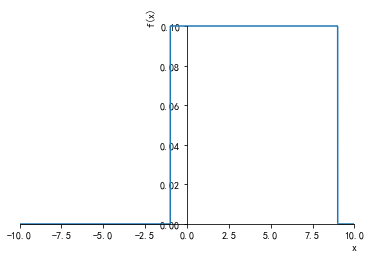

1.00000000000000

In [122]:
fx = Piecewise((0.1,(x>=-1) & (x<9)),(0, True))
plot(fx)
integrate(fx,(x,-oo,oo))


In [75]:
g
g.subs(x,1)
g.subs({x:1})
[g.subs(x,i) for i in [1,2,3,4]]
ranges = [-oo,1,6,+oo]
p_list = []
for i in range(len(ranges)-1):
    p_list.append(integrate(fx,(x, ran[i], ranges[i+1])).evalf(2))
#     g.subs(x,integrate(fx,(x, ran[i], ran[i+1])))
p_list
pd.DataFrame(data=np.stack(([-1,2,3],p_list),axis=1),columns=['Y','p'])

Piecewise((-1, x < 1), (1, Eq(x, 1)), (2, (x <= 6) & (x > 1)), (3, x > 6))

1

1

[1, 2, 2, 2]

[0.20, 0.50, 0.30]

Y     p
0  -1  0.20
1   2  0.50
2   3  0.30

#### 2003Âπ¥Êï∞Â≠¶‰∏âÁ¨¨11È¢ò  
ËÆæÈöèÊú∫ÂèòÈáèXÁöÑÊ¶ÇÁéáÂØÜÂ∫¶‰∏∫$$f(x)=\begin{cases} \frac{1}{3\sqrt[3]{x^2}} & x \in [1,8]\\0 & other\end{cases}$$
F(X)ÊòØXÁöÑÂàÜÂ∏ÉÂáΩÊï∞ÔºåÊ±ÇÈöèÊú∫ÂèòÈáèY=F(X)ÁöÑÂàÜÂ∏ÉÂáΩÊï∞  


In [79]:
from fractions import Fraction

Piecewise((1/(3*x**(2/3)), (x >= 1) & (x <= 8)), (0, True))

2**(1/3)/6

1

<string>:1: RuntimeWarning: invalid value encountered in double_scalars


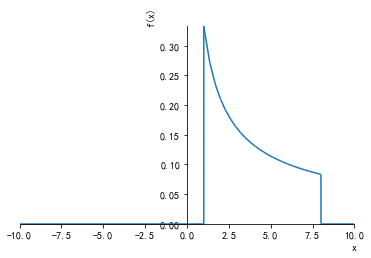

Piecewise((Piecewise((0, x < 1), (Min(8, x)**(1/3) - 1, True)), (x >= 1) & (x <= 8)), (0, x < 1), (1, x > 1))

<string>:1: RuntimeWarning: invalid value encountered in double_scalars


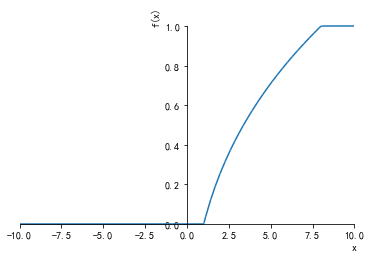

-1 + 3**(1/3)

In [108]:
t = symbols('t')
fx = Piecewise((1/(3*x**(Fraction(2,3))),(x>=1)&(x<=8)),(0,True)) # Ê¶ÇÁéáÂØÜÂ∫¶
fx
fx.subs(x,2)
integrate(fx,(x,-oo,oo))
# solve(fx,x)
plot(fx)

# ÂàÜÂ∏ÉÂáΩÊï∞ÂêåÊó∂‰πüÊòØYÁöÑÊñπÁ®ã
Fx = Piecewise((integrate(fx,(x,1,x)),(x>=1)&(x<=8)),(0,x<1),(1,x>1)) 
Fx
plot(Fx)
Fx.subs(x,3)

Piecewise((Piecewise((0, (y + 1.0)**3 < 1), (Min(8, (y + 1.0)**3)**(1/3) - 1, True)), (y >= 0) & (y <= 1.0)), (0, (y + 1.0)**3 < 1), (1, (y + 1.0)**3 > 1))

Piecewise((0, y < 0), (y, y <= 1), (1, True))

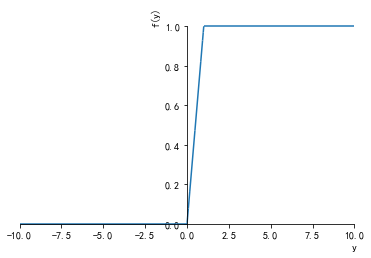

Piecewise((0, y < 0), (1, y <= 1), (0, True))

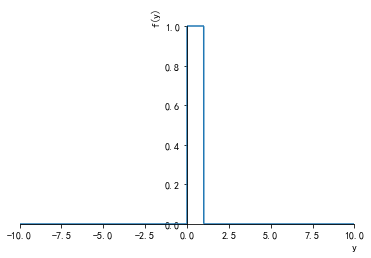

In [121]:
Fx_ = x**(1/3)-1-y
# fx_
# inv_func(f,x)
x1 = inv_func(Fx_,x)
Fx.subs(x,x1) #Á≠âÂæÖÂåñÁÆÄÁöÑÁªìÊûú

# YÁöÑÂàÜÂ∏ÉÂáΩÊï∞
Fy = Piecewise((0,y<0),(y,(y>=0) & (y<=1)),(1,y>1))
Fy
plot(Fy)
fy = diff(Fy,y)
fy
plot(fy)

# Â§öÁª¥ÈöèÊú∫ÂèòÈáèÂèäÂÖ∂ÂàÜÂ∏É

## ‰∫åÁª¥ÈöèÊú∫ÂèòÈáè

## ËæπÁºòÂàÜÂ∏É

## Êù°‰ª∂ÂàÜÂ∏É

## Áõ∏‰∫íÁã¨Á´ãÁöÑÈöèÊú∫ÂèòÈáè

## ‰∏§‰∏™ÈöèÊú∫ÂèòÈáèÁöÑÂáΩÊï∞ÁöÑÂàÜÂ∏É

### ËøûÁª≠ÊÄßÈöèÊú∫ÂèòÈáèÁöÑÂáΩÊï∞ÁöÑÂàÜÂ∏É

#### ‰æã1  
Â§ßÁÇÆÊâìÈù∂Êó∂ÔºåÁÇÆÂºπÂºπÁùÄÁÇπ(X,Y)(ËÆæÈù∂ÂøÉ‰∏∫ÂéüÁÇπ)Êúç‰ªé‰∫åÁª¥Ê≠£ÊÄÅÂàÜÂ∏É$N(0,0,\sigma^2,\sigma^2,0)$ÔºåÊ±ÇÂ∏¶ÁùÄÁÇπÂà∞Èù∂ÂøÉË∑ùÁ¶ªZÁöÑÊ¶ÇÁéáÂØÜÂ∫¶

Ëß£Ôºö  
ZÁöÑÂàÜÂ∏ÉÂáΩÊï∞
$$F_Z(z)=P(Z<z)=\iint_{\sqrt{x^2+y^2}\le z}\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}dxdy$$

In [137]:
x,y,z = symbols('x y z')
mu,sigma = symbols('mu sigma')
mu=0
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx
fy = (1/(sigma*sqrt(2*pi)))*exp(-(y-mu)**2/(2*sigma**2))
fxy=fx*fy
fxy
fxy = simplify(fxy)
fxy

sqrt(2)*exp(-x**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

exp(-x**2/(2*sigma**2))*exp(-y**2/(2*sigma**2))/(2*pi*sigma**2)

exp((-x**2 - y**2)/(2*sigma**2))/(2*pi*sigma**2)

In [144]:
# Âåñ‰∏∫ÊûÅÂùêÊ†áÁßØÂàÜ
rho,theta = symbols('rho theta')
fxy_ = fxy.subs({x: rho*cos(theta),y:rho*sin(theta)})
fxy_ = simplify(fxy_)
fxy_
Fz_=Integral(rho*fxy_,(rho, 0, z),(theta, 0, 2*pi))
# ÁªìÊûú
simplify(Fz.doit())
Fz = Piecewise((simplify(Fz.doit()),z>=0),(0,z<0))
Fz

exp(-rho**2/(2*sigma**2))/(2*pi*sigma**2)

Piecewise((1 - exp(-z**2/(2*sigma**2)), z >= 0), (0, True))

Piecewise((1 - exp(-z**2/(2*sigma**2)), z >= 0), (0, True))

ÁëûÂà©ÂàÜÂ∏É

In [148]:
# Ê¶ÇÁéáÂØÜÂ∫¶
# ÁëûÂà©ÂàÜÂ∏É
fz = diff(Fz,z)
fz

Piecewise((z*exp(-z**2/(2*sigma**2))/sigma**2, z >= 0), (0, True))

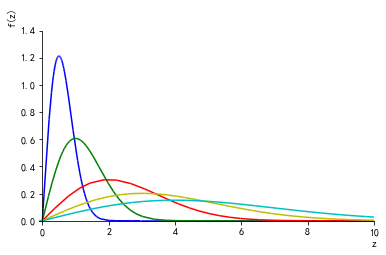

In [183]:
fz_list=[]
for i in [0.5,1,2,3,4]:
    fz_list.append(fz.subs(sigma,i))

p = plot(*fz_list,show=False,xlim=(-0.1,10),ylim=(-0.1,1.5))
p[0].line_color='b'
p[1].line_color='g'
p[2].line_color='r'
p[3].line_color='y'
p[4].line_color='c'

p.show()

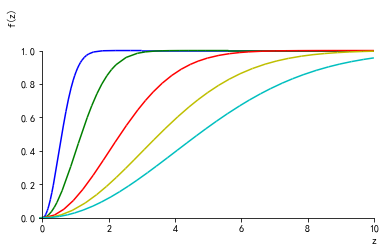

In [185]:
Fz_list=[]
for i in [0.5,1,2,3,4]:
    Fz_list.append(Fz.subs(sigma,i))

p = plot(*Fz_list,show=False,xlim=(-0.1,10),ylim=(-0.1,1.2))
p[0].line_color='b'
p[1].line_color='g'
p[2].line_color='r'
p[3].line_color='y'
p[4].line_color='c'

p.show()

#### ‰æã2  2001Âπ¥Êï∞Â≠¶‰∏âÁ¨¨12È¢ò
ËÆæÈöèÊú∫ÂèòÈáè$X$Âíå$Y$ÁöÑËÅîÂêàÂàÜÂ∏ÉÊòØÊ≠£ÊñπÂΩ¢$$G=\{(x,y)|1\le x \le 3,1\le y \le 3\}$$‰∏äÁöÑÂùáÂåÄÂàÜÂ∏ÉÔºåËØïÊ±ÇÈöèÊú∫ÂèòÈáè$U=|X-Y|$ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶$p(u)$

In [240]:
x, y, u = symbols('x y u')
# X,YÁöÑËÅîÂêàÊ¶ÇÁéáÂØÜÂ∫¶
fxy = Piecewise((1 / 4, (x >= 1) & (x <= 3) & (y >= 1) & (y <= 3)), (0, True))
fxy
fxy.subs({x: 1, y: 0})
# ËÆæÂõõ‰∏™ÁÇπÁöÑÂùêÊ†á(1,y1)(x1,3) (x2,1)(3,y2)
f1 = x + u - y
f2 = x - u - y
y1 = solve(f1.subs(x,1),y)
y2 = solve(f2.subs(x,3),y)
x1 = solve(f1.subs(y,3),x)
x2 = solve(f2.subs(y,1),x)
(1,y1)
(x1,3)
(x2,1)
(3,y2)
# UÁöÑÂàÜÂ∏ÉÂáΩÊï∞
Fu=Piecewise(((4-(3-(u+1))**2)/4,(u>0)&(u<2)),(1,u>=2),(0,u<=0))
Fu
# UÁöÑÊ¶ÇÁéáÂØÜÂ∫¶
fu = diff(Fu,u)
fu

Piecewise((0.25, (x >= 1) & (y >= 1) & (x <= 3) & (y <= 3)), (0, True))

0

(1, [u + 1])

([3 - u], 3)

([u + 1], 1)

(3, [3 - u])

Piecewise((1 - (2 - u)**2/4, (u > 0) & (u < 2)), (1, u >= 2), (0, u <= 0))

Piecewise((1 - u/2, (u > 0) & (u < 2)), (0, (u >= 2) | (u <= 0)))

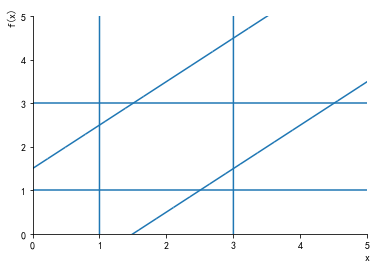

In [231]:
u_=1.5
p = plot(1,3,x-u_,x+u_,10000*(x-1),10000*(x-3),xlim=(0,5),ylim=(0,5),show=False)
p.show()

### ‰∫åÁª¥Á¶ªÊï£ÂûãÈöèÊú∫ÂèòÈáè  
ÊñπÊ≥ïÁ±ª‰ºº‰∫é‰∏ÄÁª¥Á¶ªÊï£ÂûãÈöèÊú∫ÂèòÈáè

ÂÅáËÆæÈöèÊú∫ÂèòÈáè$X1,X2,X3,X4$Áõ∏‰∫íÁã¨Á´ã‰∏îÂêåÂàÜÂ∏É,  
$P\{X_i=0\}=0.6, \ P\{X_i=1\}=0.4 \ (i=1,2,3,4)$  
Ê±ÇË°åÂàóÂºè$X = \begin{vmatrix}X_1 & X_2 \\ X_3 & X_4\\ \end{vmatrix}$ÁöÑÊ¶ÇÁéáÂàÜÂ∏É

### Z=X+YÁöÑÊ¶ÇÁéáÂàÜÂ∏É  
$f_Z(z)=\int_{-\infty}^{\infty}f(z-y,y)dy$  
$f_Z(z)=\int_{-\infty}^{\infty}f(x,z-x)dx$  
***
Â¶ÇÊûú$X$Âíå$Y$Áõ∏‰∫íÁã¨Á´ã  
Âç∑ÁßØÂÖ¨Âºè  
$f_X*f_Y=\int_{-\infty}^{\infty}f_X(z-y)f_Y(y)dy=\int_{-\infty}^{\infty}f_X(x)f_Y(z-x)dx$  
***
$Z=aX+bY$  
$f_X*f_Y=\int_{-\infty}^{\infty}\frac{1}{|a|}f_X(\frac{z-by}{a})f_Y(y)dy=\int_{-\infty}^{\infty}\frac{1}{|b|}f_X(x)f_Y(\frac{z-ax}{b})dx$  


#### ‰æã5   
ËÆæ$X$Âíå$Y$ÊòØ‰∏§‰∏™Áõ∏‰∫íÁã¨Á´ãÁöÑÈöèÊú∫ÂèòÈáèÔºåÂÆÉ‰ª¨ÈÉΩÊúç‰ªéÊ†áÂáÜÊ≠£ÊÄÅÂàÜÂ∏É$N(0,1)$ÔºåÊ±Ç$Z=X+Y$ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶

In [10]:
x,y,z = symbols('x y z')
mu,sigma = symbols('mu sigma')
f = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx = f.subs({mu:0,sigma:1})
fy = f.subs({x:y,mu:0,sigma:1})
fx
fy
fxyz = Integral(fx*fy.subs(y,z-x),(x,-oo,+oo))
fxyz_ = simplify(fxyz.doit())
fxyz
fxyz_

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

sqrt(2)*exp(-y**2/2)/(2*sqrt(pi))

Integral(exp(-x**2/2)*exp(-(-x + z)**2/2)/(2*pi), (x, -oo, oo))

exp(-z**2/4)/(2*sqrt(pi))

Ê≠£ÊÄÅÂàÜÂ∏ÉÁöÑÂèØÂä†ÊÄß  

$Ëã•X\sim N(0,1),Y\sim N(0,1)‰∏îXÂíåYÁõ∏‰∫íÁã¨Á´ã \\ 
ÂàôX+Y\sim N(0,2)$  
$Ëã•X\sim N(\mu_1,\sigma_1^2),Y\sim N((\mu_2,\sigma_2^2)‰∏îXÂíåYÁõ∏‰∫íÁã¨Á´ã \\ 
ÂàôX+Y\sim N(\mu_1+\mu_2,\sigma_1^2+\sigma_2^2)\\
ÂàôaX+bY\sim N(a\mu_1+b\mu_2,a^2\sigma_1^2+b^2\sigma_2^2)$  

‰ª•‰∏äÁªìÊûúËøòÂèØ‰ª•Êé®Âπøn‰∏™Ê≠£ÊÄÅÂàÜÂ∏ÉÁöÑÈöèÊú∫ÂèòÈáè  
***
‰∫åÈ°πÂàÜÂ∏ÉÂíåÊ≥äÊùæÂàÜÂ∏É‰πüÂÖ∑ÊúâÂèØÂä†ÊÄß  

$X\sim b(n,p),y\sim b(m,p)‰∏îXÂíåYÁõ∏‰∫íÁã¨Á´ã\Rightarrow X+Y\sim b(n+m,p)$  
Âç≥Ôºö$P\{X=k\}=C_n^kp^k(1-p)^{n-k},(k=0,1,...,n)\\
P\{Y=k\}=C_m^kp^k(1-p)^{m-k},(k=0,1,...,m)\\
P\{X+Y=k\}=C_{m+n}^kp^k(1-p)^{n+m-k},(k=0,1,...,n)$  
***  
$X\sim \pi(\lambda_1),y\sim \pi(\lambda_2)‰∏îXÂíåYÁõ∏‰∫íÁã¨Á´ã\Rightarrow X+Y\sim \pi(\lambda_1+\lambda_2)$  
Âç≥Ôºö$P\{X=k\}=\frac{\lambda_1^k}{k!}e^{-\lambda_1}\\
P\{Y=k\}=\frac{\lambda_2^k}{k!}e^{-\lambda_2}\\
P\{X+Y=k\}=\frac{(\lambda_1+\lambda_2)^k}{k!}e^{-(\lambda_1+\lambda_2)}$

In [20]:
m, n, k, p = symbols('m n k p')
f = combine(n, k) * p**(k) * (1 - p)**(n - k)
f
fn = f.subs(n, n)
fm = f.subs(n, m)
fn
fm
# simplify(fn+fm)

p**k*(1 - p)**(-k + n)*factorial(n)/(factorial(k)*factorial(-k + n))

p**k*(1 - p)**(-k + n)*factorial(n)/(factorial(k)*factorial(-k + n))

p**k*(1 - p)**(-k + m)*factorial(m)/(factorial(k)*factorial(-k + m))

p**k*(1 - p)**(-k)*((1 - p)**m*gamma(m + 1)*gamma(-k + n + 1) + (1 - p)**n*gamma(n + 1)*gamma(-k + m + 1))/(gamma(k + 1)*gamma(-k + m + 1)*gamma(-k + n + 1))

‰æã7  
$ÂØπ‰∫éÁÆÄÂçïÁîµË∑Ø‰∏≠Ôºå‰∏§ÁîµÈòªÁöÑR_1ÂíåR_2‰∏≤ËÅîËøûÊé•,ËÆæR_1ÂíåR_2Áõ∏‰∫íÁã¨Á´ã,ÂÆÉ‰ª¨ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶Âùá‰∏∫\\
f(x)=\begin{cases}\frac{10-x}{50} & 0\le x\le 10\\ 0 & ÂÖ∂ÂÆÉ\end{cases}\\
Ê±ÇÊÄªÁîµÈòªR=R_1+R_2ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶$

In [24]:
x,y,z = symbols('x y z')
f=Piecewise(((10-x)/50,(x>=0)&(x<=10)),(0,True))
integrate(f,(x,-oo,oo))

1

In [36]:
fx = f.subs(x,x)
fy = f.subs(x,z-x)
fxy = Piecewise((fx*fy, (x>=0)&(x<=10)&(x>=z-10)&(x<=z)))
# fxy = Piecewise((fx*fy, (x>=0)&(x<=10)&(x>=z-10)&(x<=z)&(z>=10)&(z<20)))
simplify(fxy)
fz = Integral(fx*fy,(x,-oo,oo))
fz
simplify(Piecewise((fz.doit(),(z>=10)&(z<20))))
simplify(fz.subs(z,10).doit())

Piecewise((Piecewise(((10 - x)*(x - z + 10)/2500, (x >= 0) & (x <= 10) & (x - z >= -10) & (x - z <= 0)), (0, True)), (x >= 0) & (x <= 10) & (x <= z) & (x >= z - 10)))

Integral(Piecewise(((1/5 - x/50)*(x/50 - z/50 + 1/5), (x >= 0) & (x <= 10) & (x - z >= -10) & (x - z <= 0)), (0, True)), (x, -oo, oo))

Piecewise((-z*Max(0, z - 10)**2/5000 + z*Max(0, z - 10, Min(10, z))**2/5000 + (z - 10)*Max(0, z - 10)/250 - (z - 10)*Max(0, z - 10, Min(10, z))/250 + Max(0, z - 10)**3/7500 - Max(0, z - 10, Min(10, z))**3/7500, (z >= 10) & (z < 20)))

1/15

In [106]:
# ÂèòÈáè‰ª£Êç¢
g = x+1+Max(x,0)
g1=g.subs(x,(z1+1))
g1
g1.subs(z1,(z**2))

2*z + 3

2*z**2 + 3

In [123]:
# ËÆ°ÁÆóÂΩì10<=z<=20Êó∂ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶
# ÈÄöËøáÊ≠£Ë¥üÂÄºÁöÑÂèòÊç¢Êù•ÊéßÂà∂MaxÂíåMinÂáΩÊï∞ÁöÑÂèñÂÄº
z1 = symbols('z', positive=True)
z2 = symbols('z', negative=True)
Max((z2+20),20)
fz_ = fz.doit()
fz_
fz_1 = fz_.subs(z,(z1+10))
fz_1
fz_2 = fz_1.subs(z1,(z-10))
fz_2
fz_3 = fz_2.subs(z,(z2+20))
fz_3
fz_4 = fz_3.subs(z2,(z-20))
fz_4.subs(z,10)
simplify(fz_4*15000) # ÁªìÊûú
# fz_.subs(z,(z2+20))

20

-z*Max(0, z - 10)**2/5000 + z*Max(0, z - 10, Min(10, z))**2/5000 - (1/25 - z/250)*Max(0, z - 10) + (1/25 - z/250)*Max(0, z - 10, Min(10, z)) + Max(0, z - 10)**3/7500 - Max(0, z - 10, Min(10, z))**3/7500

z**3/7500 - z**2*(z + 10)/5000 + z**2/250 - z*Max(10, z)/250 + (z + 10)*Max(10, z)**2/5000 - Max(10, z)**3/7500

-z*(z - 10)**2/5000 + z*Max(10, z - 10)**2/5000 + (z - 10)**3/7500 + (z - 10)**2/250 - (z - 10)*Max(10, z - 10)/250 - Max(10, z - 10)**3/7500

-z/50 + (z + 10)**3/7500 - (z + 10)**2*(z + 20)/5000 + (z + 10)**2/250 - 2/15

1/15

-z**3 + 60*z**2 - 1200*z + 8000

In [122]:
# ËÆ°ÁÆóÂΩì0<=z<=10Êó∂ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶
z1 = symbols('z', positive=True)
z2 = symbols('z', negative=True)
fz_ = fz.doit()
fz_1=fz_.subs(z,z1).subs(z1,z2+10).subs(z2,z-10)
simplify(fz_1) # ÁªìÊûú

z*(z**2 - 60*z + 600)/15000

In [73]:
fz_1=-z*(z-10)**2/5000+z/50+(z-10)**2/250-(z-10)/25+(z-10)**3/7500-10/75
fz_1
simplify(fz_1)
simplify(fz_1*10000)
simplify(fz_1*15000)
expand((20-z)**3)

-z*(z - 10)**2/5000 - z/50 + (z - 10)**3/7500 + (z - 10)**2/250 + 0.266666666666667

-6.66666666666667e-5*z**3 + 0.004*z**2 - 0.08*z + 0.533333333333333

-0.666666666666667*z**3 + 40.0*z**2 - 800.0*z + 5333.33333333333

-1.0*z**3 + 60.0*z**2 - 1200.0*z + 8000.0

-z**3 + 60*z**2 - 1200*z + 8000

In [79]:
z1 = symbols('z', positive=True)
z2 = symbols('z', negative=True)
Max(0,(ùëß-10)).subs(z,(z1+10))
Min(10,z).subs(z,(z2+10))
Max(0,(ùëß-10)).subs(z,15)
Max(0,(ùëß-10),Min(10,z)).subs(z,15)

z

z + 10

5

10

In [74]:
help(Max)

Help on class Max in module sympy.functions.elementary.miscellaneous:

class Max(MinMaxBase, sympy.core.function.Application)
 |  Max(*args)
 |  
 |  Return, if possible, the maximum value of the list.
 |  
 |  When number of arguments is equal one, then
 |  return this argument.
 |  
 |  When number of arguments is equal two, then
 |  return, if possible, the value from (a, b) that is >= the other.
 |  
 |  In common case, when the length of list greater than 2, the task
 |  is more complicated. Return only the arguments, which are greater
 |  than others, if it is possible to determine directional relation.
 |  
 |  If is not possible to determine such a relation, return a partially
 |  evaluated result.
 |  
 |  Assumptions are used to make the decision too.
 |  
 |  Also, only comparable arguments are permitted.
 |  
 |  It is named ``Max`` and not ``max`` to avoid conflicts
 |  with the built-in function ``max``.
 |  
 |  
 |  Examples
 |  ========
 |  
 |  >>> from sympy import M

In [48]:
import sympy 
z = symbols('z')
f=Max(0,z)
f.subs(z,1)
Piecewise((f.subs(z,z),z>0))
sympy.Max

1

Piecewise((Max(0, z), z > 0))

Max

$ËÆæ‰∫åÁª¥ÈöèÊú∫ÂèòÈáè(X,Y)ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶‰∏∫\\
f(x,y)=\begin{cases}2-x-y & 0<x<1,0<y<1\\0 & ÂÖ∂ÂÆÉ \end{cases} \\
Ê±Ç(I)P\{X>3Y\};(II)Ê±ÇZ=X+YÁöÑÊ¶ÇÁéáÂØÜÂ∫¶f_Z(z)
$

# ÈöèÊú∫ÂèòÈáèÁöÑÊï∞Â≠óÁâπÂæÅ